# PRACTICA DE NLP

## Analisis de sentimiento

### Dataset Review de Amazon

Reviews de productos de Amazon clasificadas por categorías (Deportes y actividades al aire libre). Las reviews contienen la calificación (número de estrellas)

#3. Etapa de entrenamiento y testeo de un modelo de análisis de sentimiento

### Cargo el DataFrame de un archivo CSV
Con los datos listos despues de aplicar el preprocesado para el entrenamiento de modelos

In [1]:
from google.colab import files
import pandas as pd

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Cargar el archivo
df = pd.read_csv(list(uploaded.keys())[0])

# Verificar que los datos se hayan cargado correctamente
print("Primeras filas del DataFrame:")
print(df.head())

Saving dataset_processed.csv to dataset_processed.csv
Primeras filas del DataFrame:
                                          reviewText  overall  sentiment  \
0  This came in on time and I am veru happy with ...      5.0          1   
1  I had a factory Glock tool that I was using fo...      5.0          1   
2  If you don't have a 3/32 punch or would like t...      4.0          1   
3  This works no better than any 3/32 punch you w...      4.0          1   
4  I purchased this thinking maybe I need a speci...      4.0          1   

                                        cleaned_text  
0  came time veru happy haved used already make t...  
1  factory glock tool using glock ive since lost ...  
2  dont punch would like one glock bag okay butt ...  
3  work better punch would find hardware store ac...  
4  purchased thinking maybe need special tool eas...  


Dividir tu DataFrame en conjuntos de entrenamiento y prueba, utilizando la columna sentiment como la etiqueta objetivo:

In [2]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
X = df['cleaned_text']  # Texto preprocesado
y = df['sentiment']     # Columna de etiquetas (0 o 1)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Verificar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")


Tamaño del conjunto de entrenamiento: 5250
Tamaño del conjunto de prueba: 1750


##Entrenar un modelo GradientBoostingClassifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Eliminar las filas con valores NaN en 'cleaned_text'
df = df.dropna(subset=['cleaned_text'])

# Vectorización del texto
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Normalización de las características
X_normalized = normalize(X, axis=1)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

# Función para entrenar y evaluar Gradient Boosting Classifier
def classify_gboost(X_train, X_test, y_train, y_test):
    n_estimators = 32
    clf = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=1.0,
        max_depth=1,
        random_state=42
    )

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Evaluar el modelo
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)

    # Mostrar los resultados
    print(f"[{clf.__class__.__name__}] Accuracy: train = {train_accuracy:.2f}, test = {test_accuracy:.2f}")

    return clf

# Entrenar el modelo
clf2 = classify_gboost(X_train, X_test, y_train, y_test)


[GradientBoostingClassifier] Accuracy: train = 0.74, test = 0.70


##Guardar los resultados
Guardar el modelo entrenado usando joblib.

In [ ]:
import joblib
import pandas as pd

# Guardar el modelo de GradientBoostingClassifier
joblib.dump(clf2, '/content/gradient_boosting_model.pkl')

# Guardar las características de entrenamiento y prueba
pd.DataFrame(X_train.toarray()).to_csv('/content/train_data.csv', index=False)
pd.DataFrame(X_test.toarray()).to_csv('/content/test_data.csv', index=False)

# Guardar las etiquetas de entrenamiento y prueba
y_train.to_csv('/content/train_labels.csv', index=False)
y_test.to_csv('/content/test_labels.csv', index=False)

# Guardar las predicciones (si las deseas para análisis posterior)
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)

pd.DataFrame(y_train_pred).to_csv('/content/train_predictions.csv', index=False)
pd.DataFrame(y_test_pred).to_csv('/content/test_predictions.csv', index=False)


###Descargar los archivos

In [ ]:
from google.colab import files

# Descargar los archivos
files.download('/content/gradient_boosting_model.pkl')
files.download('/content/train_data.csv')
files.download('/content/test_data.csv')
files.download('/content/train_labels.csv')
files.download('/content/test_labels.csv')
files.download('/content/train_predictions.csv')
files.download('/content/test_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Entrenar Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd

# Entrenar Random Forest
def classify_rf(X_train, X_test, y_train, y_test):
    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Entrenar el modelo
    clf_rf.fit(X_train, y_train)

    # Evaluar el modelo
    train_accuracy = clf_rf.score(X_train, y_train)
    test_accuracy = clf_rf.score(X_test, y_test)

    # Mostrar los resultados
    print(f"[{clf_rf.__class__.__name__}] Accuracy: train = {train_accuracy:.2f}, test = {test_accuracy:.2f}")

    return clf_rf

# Entrenar el modelo de Random Forest
clf_rf = classify_rf(X_train, X_test, y_train, y_test)

# Guardar el modelo de Random Forest
joblib.dump(clf_rf, '/content/random_forest_model.pkl')

# Guardar las características de entrenamiento y prueba
pd.DataFrame(X_train.toarray()).to_csv('/content/rf_train_data.csv', index=False)
pd.DataFrame(X_test.toarray()).to_csv('/content/rf_test_data.csv', index=False)

# Guardar las etiquetas de entrenamiento y prueba
y_train.to_csv('/content/rf_train_labels.csv', index=False)
y_test.to_csv('/content/rf_test_labels.csv', index=False)

# Guardar las predicciones (si las deseas para análisis posterior)
y_train_pred_rf = clf_rf.predict(X_train)
y_test_pred_rf = clf_rf.predict(X_test)

pd.DataFrame(y_train_pred_rf).to_csv('/content/rf_train_predictions.csv', index=False)
pd.DataFrame(y_test_pred_rf).to_csv('/content/rf_test_predictions.csv', index=False)


[RandomForestClassifier] Accuracy: train = 1.00, test = 0.79


In [ ]:
from google.colab import files

# Descargar los archivos de Random Forest
files.download('/content/random_forest_model.pkl')
files.download('/content/rf_train_data.csv')
files.download('/content/rf_test_data.csv')
files.download('/content/rf_train_labels.csv')
files.download('/content/rf_test_labels.csv')
files.download('/content/rf_train_predictions.csv')
files.download('/content/rf_test_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Probamos con un modelo de Deep Learning!
##Preprocesamiento inicial

In [3]:
# Asegurar que no haya valores NaN en 'cleaned_text' y que todos los valores sean cadenas
df['cleaned_text'] = df['cleaned_text'].fillna("").astype(str)

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['sentiment'], test_size=0.25, random_state=42, stratify=df['sentiment']
)

# Comprobar que los datos son cadenas
print(f"¿Todos los elementos de X_train son cadenas? {all(isinstance(x, str) for x in X_train)}")
print(f"¿Todos los elementos de X_test son cadenas? {all(isinstance(x, str) for x in X_test)}")

# Calcular la longitud máxima y la longitud promedio de las frases en X_train
max_length = 0
mean_length = []
for example in X_train:
    length = len(example.split())  # Contar palabras en cada reseña
    mean_length.append(length)
    if length > max_length:
        max_length = length

average_length = sum(mean_length) / len(mean_length)

print(f"Longitud máxima de las frases en X_train: {max_length}")
print(f"Longitud promedio de las frases en X_train: {average_length:.2f}")


¿Todos los elementos de X_train son cadenas? True
¿Todos los elementos de X_test son cadenas? True
Longitud máxima de las frases en X_train: 921
Longitud promedio de las frases en X_train: 43.48


##Tokenización y análisis

In [4]:
# Tokenización y ajuste al conjunto de entrenamiento
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)  # Limitar el vocabulario a las 5000 palabras más frecuentes
tokenizer.fit_on_texts(X_train)  # Ajustar tokenizador solo con datos de entrenamiento

# Convertir texto a secuencias
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Rellenar secuencias al tamaño máximo de palabras
max_words = 500  # Reducido a 500 palabras por secuencia
X_train_padded = pad_sequences(X_train_seq, maxlen=max_words, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_words, padding='post')

print(f"Forma de X_train_padded: {X_train_padded.shape}")
print(f"Forma de X_test_padded: {X_test_padded.shape}")


Forma de X_train_padded: (5250, 500)
Forma de X_test_padded: (1750, 500)


##Definir y construir el modelo

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import RMSprop

# Tamaño del vocabulario basado en el tokenizador
vocabulary_size = min(len(tokenizer.word_index) + 1, 5000)  # Limitar al vocabulario de 5000 palabras
embedding_size = 128  # Aumentar el tamaño del embedding para capturar más información

# Definir el modelo con una sola capa LSTM y simplificado
model = Sequential([
    Embedding(input_dim=vocabulary_size, output_dim=embedding_size, input_length=max_words),
    Bidirectional(LSTM(units=64, return_sequences=False)),  # Capa LSTM bidireccional simplificada
    Dropout(0.3),  # Regularización moderada
    Dense(units=1, activation='sigmoid')  # Salida binaria (sentimiento)
])

# Resumen del modelo
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


##Compilar y entrenar el modelo

In [6]:
# Importar optimizadores y callbacks
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# Probar con el optimizador RMSprop para una convergencia más rápida
optimizer = RMSprop(learning_rate=0.001)  # Aumentar tasa de aprendizaje

# Compilar el modelo con un optimizador RMSprop y mayor tasa de aprendizaje
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callback de EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=20,  # Mantener el número de épocas
    batch_size=64,  # Mantener tamaño del batch, pero puedes probar con 32 o 128
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.5338 - loss: 0.6876 - val_accuracy: 0.6783 - val_loss: 0.6119
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.7599 - loss: 0.5247 - val_accuracy: 0.7263 - val_loss: 0.5370
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8474 - loss: 0.3697 - val_accuracy: 0.8011 - val_loss: 0.4970
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8925 - loss: 0.2761 - val_accuracy: 0.7989 - val_loss: 0.5018
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.9179 - loss: 0.2232 - val_accuracy: 0.8091 - val_loss: 0.5428
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9296 - loss: 0.1924 - val_accuracy: 0.8011 - val_loss: 0.5830


In [7]:
# Evaluar el modelo en el conjunto de entrenamiento
train_scores = model.evaluate(X_train_padded, y_train, verbose=0)
print(f"Train Loss: {train_scores[0]:.4f}, Train Accuracy: {train_scores[1]:.4f}")

# Evaluar el modelo en el conjunto de prueba
test_scores = model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Test Loss: {test_scores[0]:.4f}, Test Accuracy: {test_scores[1]:.4f}")


Train Loss: 0.3213, Train Accuracy: 0.8836
Test Loss: 0.4970, Test Accuracy: 0.8011


##Guardar y descargar los resultados

In [8]:
import pandas as pd
from google.colab import files

# Guardar el modelo
model.save('sentiment_lstm_model_deeplearning.keras')

# Guardar resultados del entrenamiento en un DataFrame
results = pd.DataFrame({
    'epoch': range(1, len(history.history['accuracy']) + 1),
    'train_accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'],
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})

# Guardar resultados a un archivo CSV
results.to_csv('training_results_lstm_deeplearning.csv', index=False)

# Descargar los archivos
files.download('sentiment_lstm_model_deeplearning.keras')
files.download('training_results_lstm_deeplearning.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Importar las librerías necesarias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


###Definir los resultados de los tres *modelos*

In [ ]:
# Definir los resultados de cada modelo
results = {
    'Model': ['Gradient Boosting', 'Random Forest', 'LSTM'],
    'Train Accuracy': [0.74, 1.00, 0.9074],
    'Test Accuracy': [0.70, 0.79, 0.8091],
    'Train Loss': [None, None, 0.2457],  # Solo LSTM tiene pérdida
    'Test Loss': [None, None, 0.4361],   # Solo LSTM tiene pérdida
}

# Convertir a DataFrame
df_results = pd.DataFrame(results)


###Visualización de las métricas de precisión

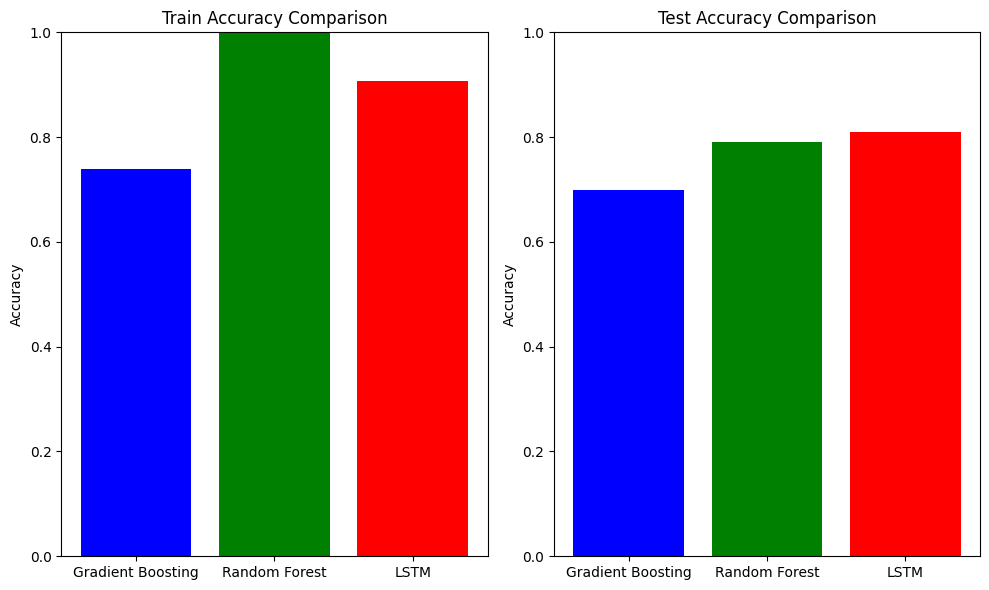

In [ ]:
# Gráfico de comparación de precisión
plt.figure(figsize=(10, 6))

# Gráfico de precisión en entrenamiento
plt.subplot(1, 2, 1)
plt.bar(df_results['Model'], df_results['Train Accuracy'], color=['blue', 'green', 'red'])
plt.title('Train Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Gráfico de precisión en prueba
plt.subplot(1, 2, 2)
plt.bar(df_results['Model'], df_results['Test Accuracy'], color=['blue', 'green', 'red'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()


###Comparación de pérdidas (Solo LSTM tiene pérdidas)
A continuación, podemos visualizar las pérdidas de entrenamiento y prueba solo para el modelo LSTM, ya que los otros modelos no las tienen

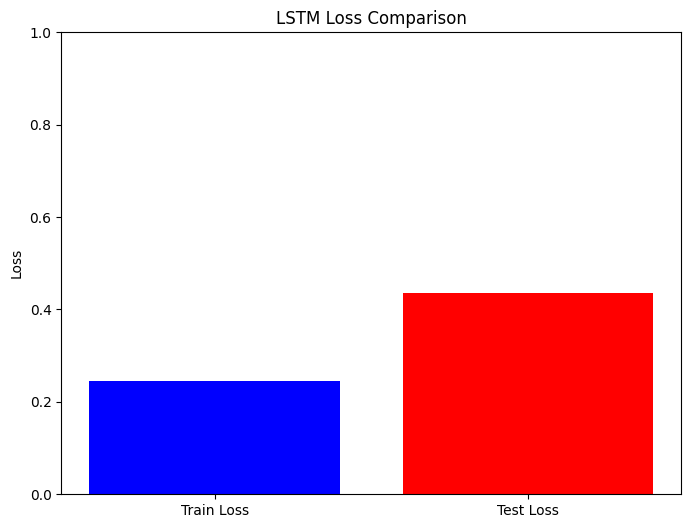

In [ ]:
# Gráfico de comparación de pérdidas (Solo LSTM tiene pérdida)
plt.figure(figsize=(8, 6))
plt.bar(['Train Loss', 'Test Loss'], [df_results['Train Loss'][2], df_results['Test Loss'][2]], color=['blue', 'red'])
plt.title('LSTM Loss Comparison')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.show()


##Mostrar la tabla de resultados

In [ ]:
# Mostrar tabla de resultados
print(df_results)

               Model  Train Accuracy  Test Accuracy  Train Loss  Test Loss
0  Gradient Boosting          0.7400         0.7000         NaN        NaN
1      Random Forest          1.0000         0.7900         NaN        NaN
2               LSTM          0.9074         0.8091      0.2457     0.4361


##Conclusión basada en las métricas

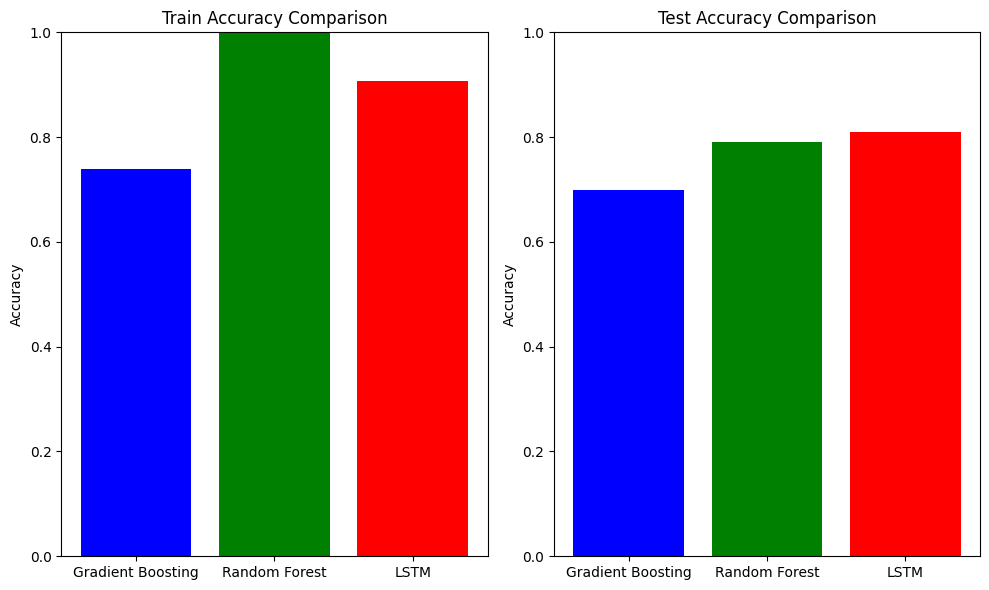

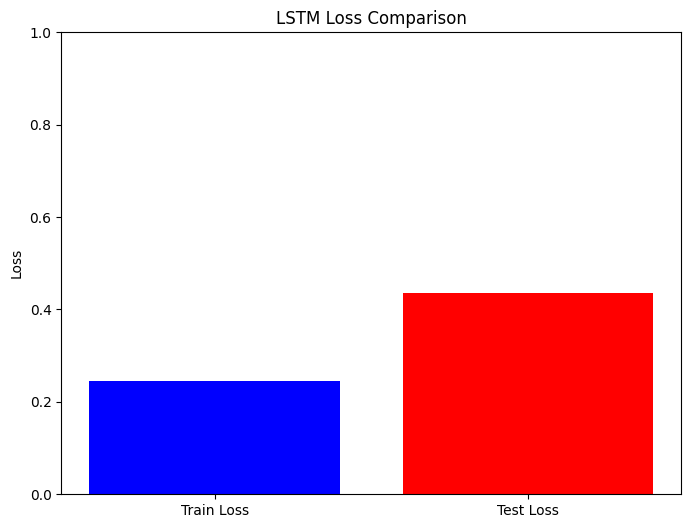

               Model  Train Accuracy  Test Accuracy  Train Loss  Test Loss
0  Gradient Boosting          0.7400         0.7000         NaN        NaN
1      Random Forest          1.0000         0.7900         NaN        NaN
2               LSTM          0.9074         0.8091      0.2457     0.4361


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Definir los resultados de cada modelo
results = {
    'Model': ['Gradient Boosting', 'Random Forest', 'LSTM'],
    'Train Accuracy': [0.74, 1.00, 0.9074],
    'Test Accuracy': [0.70, 0.79, 0.8091],
    'Train Loss': [None, None, 0.2457],  # Solo LSTM tiene pérdida
    'Test Loss': [None, None, 0.4361],   # Solo LSTM tiene pérdida
}

# Convertir a DataFrame
df_results = pd.DataFrame(results)

# Gráfico de comparación de precisión
plt.figure(figsize=(10, 6))

# Gráfico de precisión en entrenamiento
plt.subplot(1, 2, 1)
plt.bar(df_results['Model'], df_results['Train Accuracy'], color=['blue', 'green', 'red'])
plt.title('Train Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Gráfico de precisión en prueba
plt.subplot(1, 2, 2)
plt.bar(df_results['Model'], df_results['Test Accuracy'], color=['blue', 'green', 'red'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

# Gráfico de comparación de pérdidas (Solo LSTM tiene pérdida)
plt.figure(figsize=(8, 6))
plt.bar(['Train Loss', 'Test Loss'], [df_results['Train Loss'][2], df_results['Test Loss'][2]], color=['blue', 'red'])
plt.title('LSTM Loss Comparison')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.show()

# Mostrar tabla de resultados
print(df_results)


#CONCLUSIONES

- LSTM es el mejor modelo en términos de precisión de prueba (0.81) y pérdida (0.4361), lo que indica que generaliza bien a datos no vistos. Es la opción más sólida para maximizar el rendimiento.

- Random Forest tiene una precisión perfecta en entrenamiento (1.00), pero muestra sobreajuste con una menor precisión en prueba (0.79). A pesar de esto, sigue siendo una buena opción para una implementación rápida si se ajusta adecuadamente.

- Gradient Boosting tiene el peor rendimiento en prueba (0.70), por lo que no es tan eficaz como los otros dos modelos en generalización.

Recomendación: LSTM es el modelo más equilibrado y con mejor capacidad de generalización.